In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Read input image:
inputImage = cv2.imread("Testing Dataset/PageSegData/PageImg/1.jpg")
inputCopy = inputImage.copy()

# Convert BGR to grayscale:
grayscaleImage = cv2.cvtColor(inputImage, cv2.COLOR_BGR2GRAY)

In [7]:
windowSize = 31
windowConstant = -1
# Apply the threshold:
# binaryImage = cv2.adaptiveThreshold(grayscaleImage, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, windowSize, windowConstant)
thresh,binaryImage = cv2.threshold(grayscaleImage ,0 ,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# componentsNumber, labeledImage, componentStats, componentCentroids = \
# cv2.connectedComponentsWithStats(binaryImage, connectivity=4)

# # Set the minimum pixels for the area filter:
# minArea = 20

# # Get the indices/labels of the remaining components based on the area stat
# # (skip the background component at index 0)
# remainingComponentLabels = [i for i in range(1, componentsNumber) if componentStats[i][4] >= minArea]

# # Filter the labeled pixels based on the remaining labels,
# # assign pixel intensity to 255 (uint8) for the remaining pixels
# filteredImage = np.where(np.isin(labeledImage, remainingComponentLabels) == True, 255, 0).astype('uint8')

kernelSize = 3

# Set operation iterations:
opIterations = 1

# Get the structuring element:
maxKernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernelSize, kernelSize))

dilation = cv2.dilate(binaryImage,maxKernel,iterations = 1)

# Perform closing:
closingImage = cv2.morphologyEx(binaryImage, cv2.MORPH_CLOSE, maxKernel, None, None, opIterations, cv2.BORDER_REFLECT101)

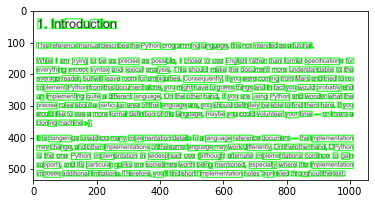

In [8]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

contours_poly = [None] * len(contours)
# The Bounding Rectangles will be stored here:
boundRect = []

# Alright, just look for the outer bounding boxes:
for i, c in enumerate(contours):

    if hierarchy[0][i][3] == -1:
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect.append(cv2.boundingRect(contours_poly[i]))


# Draw the bounding boxes on the (copied) input image:
for i in range(len(boundRect)):
    color = (0, 255, 0)
    cv2.rectangle(inputCopy, (int(boundRect[i][0]), int(boundRect[i][1])), \
              (int(boundRect[i][0] + boundRect[i][2]), int(boundRect[i][1] + boundRect[i][3])), color, 2)

plt.imshow(inputCopy)
# cv2.imwrite("C:/Users/PRATEEK SINGH/Desktop/MLTwst/text-detection-and-translation-master/text-detection-and-translation-master/temp/b.png",inputCopy)


In [9]:
list = []
print(len(boundRect))
num=0
for i in range(len(boundRect)):
    # Get the roi for each bounding rectangle:
    x, y, w, h = boundRect[i]

    # Crop the roi:
    croppedImg = inputImage[y:y + h, x:x + w]
    # plt.imshow(croppedImg)
    # cv2.imwrite(f"C:/Users/PRATEEK SINGH/Desktop/MLTwst/text-detection-and-translation-master/text-detection-and-translation-master/temp/img{num}.png",croppedImg)
    # print(num)
    # num+=1
    arr = np.array(croppedImg)
    list.append(arr)
    
    # cv2.imshow("Cropped Character: "+str(i), croppedImg)
    # cv2.waitKey(0)

list 

386


[array([[[255, 255, 255],
         [251, 249, 248],
         [255, 255, 254]],
 
        [[223, 225, 226],
         [ 56,  54,  54],
         [ 92,  86,  87]],
 
        [[222, 225, 229],
         [ 62,  61,  63],
         [ 98,  92,  93]],
 
        [[251, 254, 255],
         [211, 213, 214],
         [107, 102, 103]],
 
        [[239, 242, 246],
         [129, 131, 132],
         [156, 151, 152]],
 
        [[238, 241, 245],
         [138, 137, 139],
         [227, 225, 225]],
 
        [[251, 253, 254],
         [234, 234, 234],
         [255, 255, 255]]], dtype=uint8),
 array([[[251, 255, 255],
         [252, 252, 252],
         [255, 255, 254],
         [255, 255, 252]],
 
        [[192, 197, 196],
         [ 54,  54,  54],
         [114, 112, 111],
         [247, 244, 240]],
 
        [[214, 216, 216],
         [ 26,  27,  25],
         [109, 110, 108],
         [255, 255, 252]],
 
        [[253, 255, 254],
         [255, 255, 254],
         [255, 255, 254],
         [255, 255, 2